In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('weather_data.csv')
df.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [85]:
df.shape

(13200, 11)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [87]:
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [88]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [89]:
df.rename(columns={
    'Precipitation (%)': 'Precipitation',
    'Atmospheric Pressure': 'Pressure',
    'Visibility (km)': 'Visibility'
}, inplace=True)

In [90]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Pressure,UV Index,Visibility
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


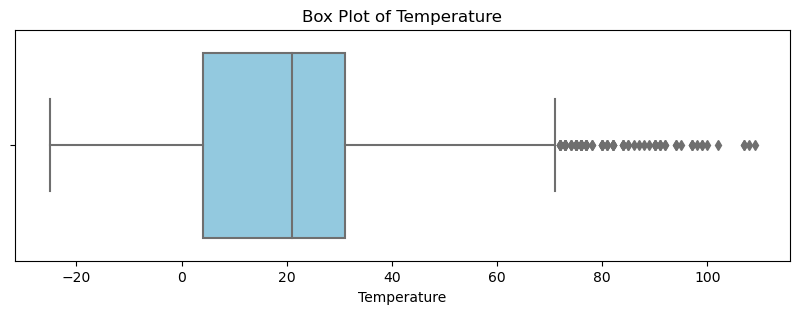

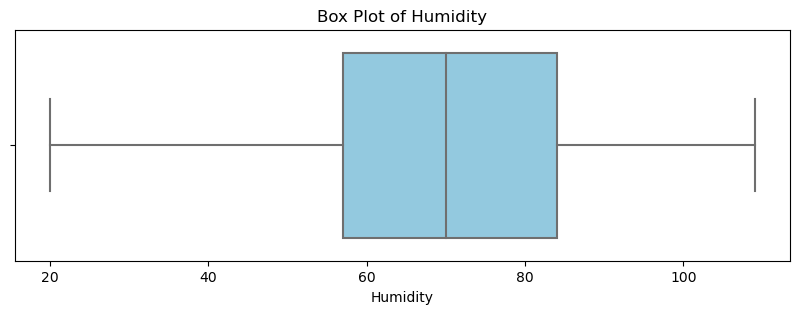

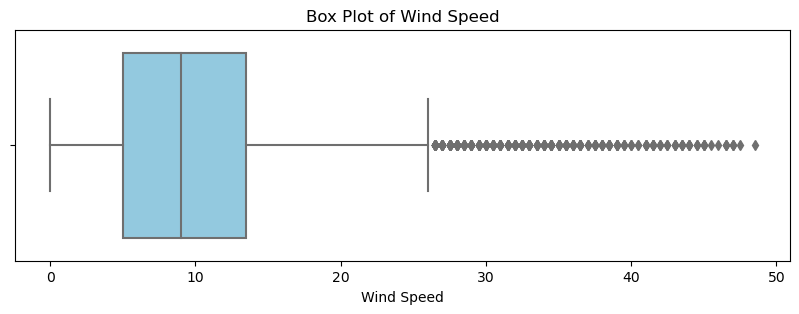

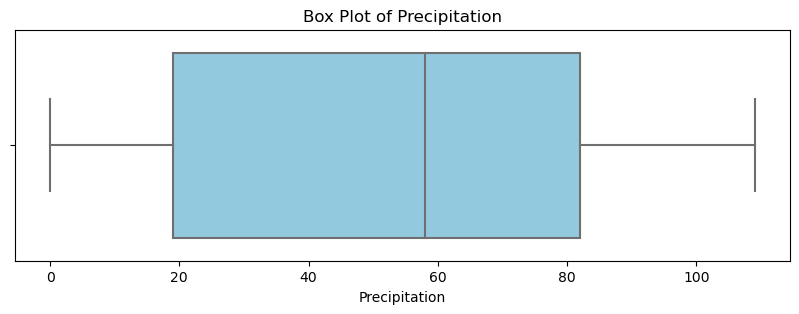

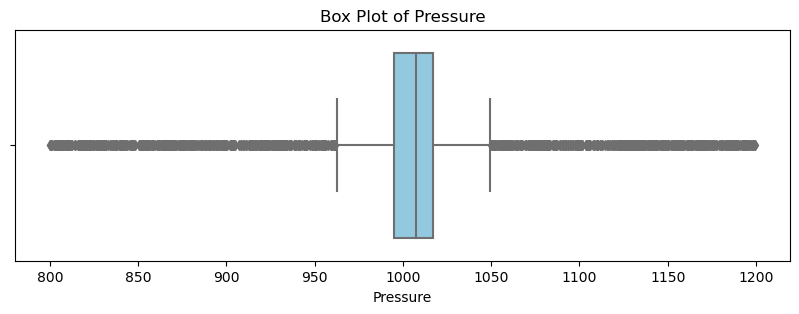

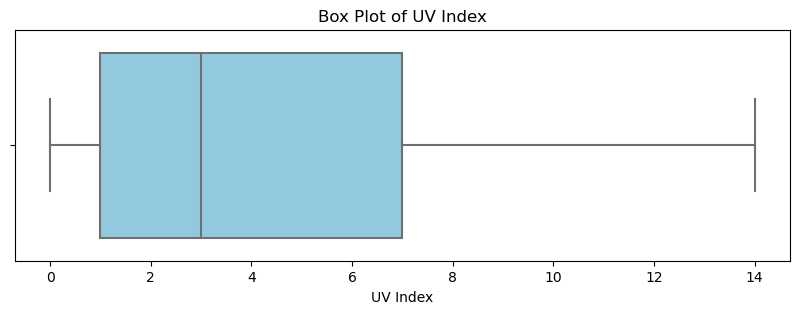

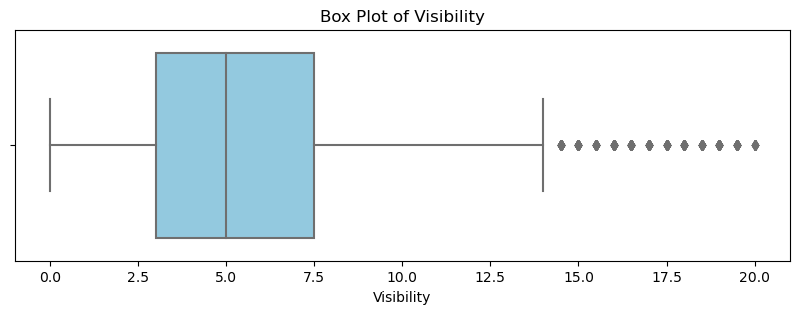

In [91]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
                  'Pressure', 'UV Index', 'Visibility']

for col in numerical_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

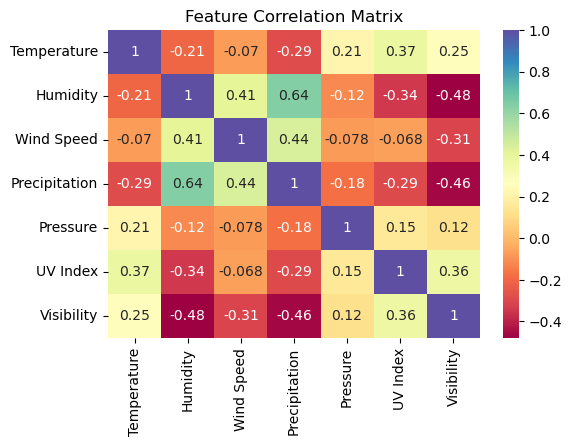

In [92]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral')
plt.title("Feature Correlation Matrix")
plt.show()

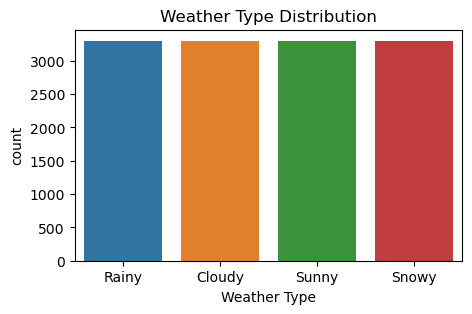

In [93]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Weather Type', data=df)
plt.title("Weather Type Distribution")
plt.show()

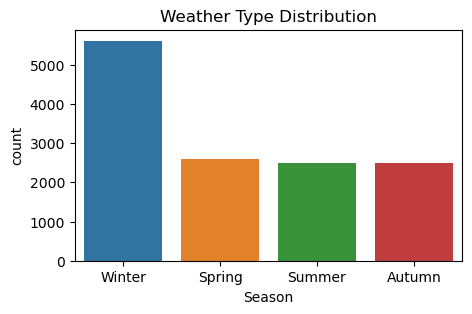

In [94]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Season', data=df)
plt.title("Weather Type Distribution")
plt.show()

In [95]:
df.select_dtypes(include=['object']).columns

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

cat_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [97]:
df.head(5)

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,UV Index,Season,Visibility,Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [98]:
#Feature scaling for GaussianNB
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [99]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((10560, 10), (2640, 10), (10560,), (2640,))

In [101]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [102]:
y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8628787878787879

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       651
           1       0.83      0.84      0.84       647
           2       0.93      0.94      0.93       701
           3       0.82      0.87      0.84       641

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640


Confusion Matrix:
 [[520  76   6  49]
 [ 19 545  39  44]
 [  5   7 656  33]
 [ 50  27   7 557]]


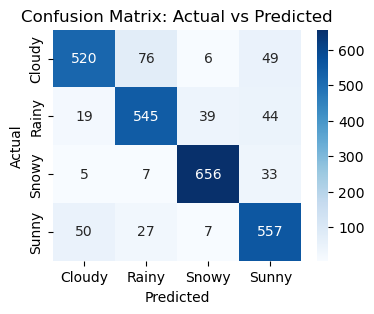

In [104]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Weather Type'].classes_,
            yticklabels=label_encoders['Weather Type'].classes_)
plt.title("Confusion Matrix: Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [105]:
actual_labels = label_encoders['Weather Type'].inverse_transform(y_test)
predicted_labels = label_encoders['Weather Type'].inverse_transform(y_pred)

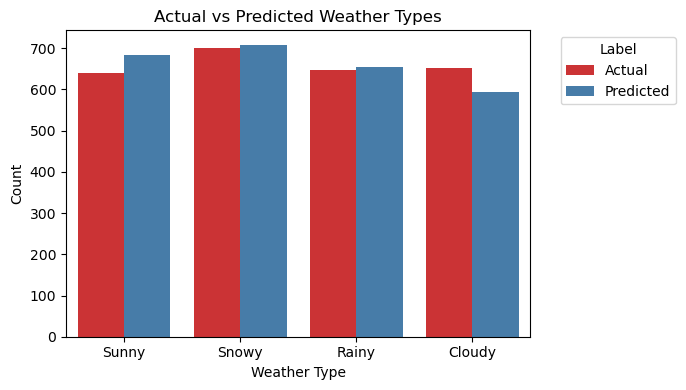

In [106]:
#DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})

plt.figure(figsize=(7, 4))
sns.countplot(x='value', hue='variable',
              data=pd.melt(comparison_df), palette='Set1')
plt.title("Actual vs Predicted Weather Types")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()